In [18]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Part a
# Generate a matrix of indicator n-grams from a matrix of words using an inclusion threshold of 5.
def token_matrix(data):
    new_data = pd.DataFrame(index=range(len(data)))
    for n in range(len(data)):
        for word in data[n]:
            if word not in new_data.columns:
                new_data[word] = 0
            new_data[word].iloc[n] += 1
    col = new_data.columns[(new_data.sum(axis=0) >= 5) == True]
    return new_data[col]

# Create the data to fit the model on. Removes punctuation, normalizes to lower case letters and applies a stemmer.
def process_text():
    data = pd.read_csv('patient_joe_text.csv')
    documents = []
    word_counts = []
    translations = dict((ord(char), " ") for char in string.punctuation)
    
    stop_words = set(stopwords.words('dutch'))
    stemmer = SnowballStemmer('dutch')
    for i in range(len(data.index)): 
        clean_text = data.loc[i, 'text'].translate(translations).lower()   
        word_list = clean_text.split()
        word_counts.append(len(word_list))
        words = [stemmer.stem(w) for w in word_list if w not in stop_words]      
        documents.append(words)
        
    new_data = pd.concat([data['category'], pd.DataFrame({'word_count': word_counts}), token_matrix(documents)], axis=1)
    return new_data

df = process_text()

C:\Users\brand\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\brand\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\brand\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\brand\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\brand\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

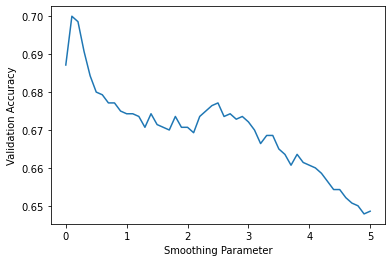

In [24]:
### Part b
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='category'], df['category'], test_size=.2, random_state=0)

param_grid = {'alpha': np.linspace(0, 5, num=51), 'binarize': [0.5]}
grid = GridSearchCV(BernoulliNB(), param_grid, scoring='accuracy')
grid.fit(X_train, y_train)

plot = sns.lineplot(x=param_grid['alpha'], y=grid.cv_results_['mean_test_score'])
plot.set(xlabel='Smoothing Parameter', ylabel='Validation Accuracy')
plt.savefig('Patient_Joe_Score_Plot.pdf')

alpha = grid.best_params_['alpha']
test_accuracy = accuracy_score(y_true=y_test, y_pred=grid.predict(X_test))